# Software Design for Data Scientists

## *Sophisticated Data Manipulation

## 1. Python's Data Science Ecosystem

With this simple Python computation experience under our belt, we can now move to doing some more interesting analysis.

### Python's Data Science Ecosystem

In addition to Python's built-in modules like the ``math`` module we explored above, there are also many often-used third-party modules that are core tools for doing data science with Python.
Some of the most important ones are:

#### [``numpy``](http://numpy.org/): Numerical Python

Numpy is short for "Numerical Python", and contains tools for efficient manipulation of arrays of data.
If you have used other computational tools like MatLab, Numpy should feel very familiar.

#### [``scipy``](http://scipy.org/): Scientific Python

Scipy is short for "Scientific Python", and contains a wide range of functionality for accomplishing common scientific tasks, such as:

* optimization/minimization
* numerical integration
* interpolation
* and much more

We will not look closely at Scipy today, but we will use its functionality later in the course.

#### [``pandas``](http://pandas.pydata.org/): Labeled Data Manipulation in Python

Pandas is short for "Panel Data", and contains tools for doing more advanced manipulation of labeled data in Python, in particular with a columnar data structure called a *Data Frame*.
If you've used the [R](http://rstats.org) statistical language, much of the functionality in Pandas should feel very familiar.

#### [``matplotlib``](http://matplotlib.org): Visualization in Python

Matplotlib started out as a Matlab plotting clone in Python, and has grown from there in the 15 years since its creation. It is the most popular data visualization tool currently in the Python data world (though other recent packages are starting to encroach on its monopoly).

# 2. Installation

### Installing Pandas & friends

Because the above packages are not included in Python itself, you need to install them separately. While it is possible to install these from source (compiling the C and/or Fortran code that does the heavy lifting under the hood) it is much easier to use a package manager like ``conda``. All it takes is to run

```
$ conda install numpy scipy pandas matplotlib
```

and (so long as your conda setup is working) the packages will be downloaded and installed on your system.

# 3. Arrays and slicing in Numpy

In [1]:
import numpy as np

### Lists in native Python

Let's create a **list**, a native Python object that we've used earlier today.

In [2]:
my_list = [2, 5, 7, 8]
my_list

[2, 5, 7, 8]

In [3]:
type(my_list)

list

This list is one-dimensional, let's make it multidimensional!

In [4]:
multi_list = [[1, 2, 3], [4, 5, 6]]

How do we access the *6* element in the second row, third column for native Python list?

In [5]:
multi_list[1][2]

6

### Converting to numpy Arrays

In [6]:
my_array = np.array(my_list)

In [7]:
type(my_array)

numpy.ndarray

In [8]:
my_array.dtype

dtype('int64')

In [9]:
my_array.shape

(4,)

In [10]:
my_array = np.array([my_list])

In [11]:
my_array.shape

(1, 4)

In [12]:
my_array

array([[2, 5, 7, 8]])

In [13]:
multi_array = np.array([[1, 2, 3], [4, 5, 6]], np.int32)

How do we access the *6* element in the second row, third column for numpy array?

In [14]:
multi_array[1][2]

6

How do we retrieve a slice of the array, `array([[1, 2], [4, 5]])`?

In [15]:
multi_array[0:2, 0:2]

array([[1, 2],
       [4, 5]], dtype=int32)

How do we retrieve the second column of the array?

In [16]:
multi_array[:, 1]

array([2, 5], dtype=int32)

## 4. Introduction to Pandas DataFrames

What are the elements of a table?

In [17]:
# Pandas DataFrames as table elements
import pandas as pd

What operations do we perform on tables?

In [18]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [2, 4, 6], 'ccc': [1.0, 33, 4]})
df.index = ['x', 'y', 'z']
df

,A,B,ccc
x,1,2,1.0
y,2,4,33.0
z,3,6,4.0


Adding to tables together:

In [19]:
df+df

,A,B,ccc
x,2,4,2.0
y,4,8,66.0
z,6,12,8.0


In [20]:
df2 = pd.DataFrame({'A': [1, 3, 2], 'B': [2, 6, 4]})
df2.index = ['x', 'z', 'y']
df2

,A,B
x,1,2
z,3,6
y,2,4


If you try to add two data frames that don't have quite the same columns:

In [21]:
df+df2

,A,B,ccc
x,2,4,NaN
y,4,8,NaN
z,6,12,NaN


We can get a subset of columns by indexing into the data frame with a set of column names:

In [22]:
sub_df = df[['A', 'ccc']]
sub_df

,A,ccc
x,1,1.0
y,2,33.0
z,3,4.0


You can also combine these operations together:

In [23]:
df['A'] + 2*df['B']

x     5
y    10
z    15
dtype: int64

# Operations on a Pandas DataFrame

## 5. Manipulating Data with DataFrames

### Downloading the data

Shell commands can be run from the notebook by preceding them with an exclamation point:

In [24]:
!ls

data_manipulation.ipynb            python_vars_and_flow_control.ipynb


uncomment this to download the data:

In [25]:
!curl -O https://s3.amazonaws.com/pronto-data/open_data_year_one.zip
!unzip open_data_year_one.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 70.8M  100 70.8M    0     0  4701k      0  0:00:15  0:00:15 --:--:-- 4832k   0  0:00:15  0:00:14  0:00:01 4900k
Archive:  open_data_year_one.zip
  inflating: 2015_station_data.csv   
  inflating: 2015_status_data.csv    
  inflating: 2015_trip_data.csv      
  inflating: 2015_weather_data.csv   
  inflating: README.txt              


### Loading Data into a DataFrame

Because we'll use it so much, we often import under a shortened name using the ``import ... as ...`` pattern:

In [26]:
import pandas as pd

Now we can use the ``read_csv`` command to read the comma-separated-value data:

In [27]:
df = pd.read_csv('2015_trip_data.csv')

*Note: strings in Python can be defined either with double quotes or single quotes*

In [28]:
type(df)

pandas.core.frame.DataFrame

In [29]:
len(df)

142846

In [30]:
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1971.0


### Viewing Pandas Dataframes

The ``head()`` and ``tail()`` methods show us the first and last rows of the data

In [31]:
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1971.0


In [32]:
df.index

RangeIndex(start=0, stop=142846, step=1)

In [33]:
smaller_df = df.loc[[1,4,6,7,9,34],:]
smaller_df

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1970.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1971.0
6,437,10/13/2014 11:35,10/13/2014 11:45,SEA00202,596.715,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Annual Member,Male,1978.0
7,438,10/13/2014 11:35,10/13/2014 11:45,SEA00311,592.131,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Annual Member,Male,1983.0
9,440,10/13/2014 11:35,10/13/2014 11:45,SEA00434,587.634,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Annual Member,Male,1958.0
34,467,10/13/2014 11:45,10/13/2014 12:00,SEA00155,860.538,Occidental Park / Occidental Ave S & S Washing...,2nd Ave & Spring St,PS-04,CBD-06,Annual Member,Female,1989.0


In [34]:
smaller_df.index

Index([1, 4, 6, 7, 9, 34], dtype='int64')

The ``shape`` attribute shows us the number of elements:

In [35]:
df.shape

(142846, 12)

The ``columns`` attribute gives us the column names

In [36]:
df.columns

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_name', 'to_station_name', 'from_station_id',
       'to_station_id', 'usertype', 'gender', 'birthyear'],
      dtype='object')

In [37]:
df.columns.tolist()

['trip_id',
 'starttime',
 'stoptime',
 'bikeid',
 'tripduration',
 'from_station_name',
 'to_station_name',
 'from_station_id',
 'to_station_id',
 'usertype',
 'gender',
 'birthyear']

The ``index`` attribute gives us the index names

In [38]:
df.index

RangeIndex(start=0, stop=142846, step=1)

The ``dtypes`` attribute gives the data types of each column:

In [39]:
df.dtypes

trip_id                int64
starttime             object
stoptime              object
bikeid                object
tripduration         float64
from_station_name     object
to_station_name       object
from_station_id       object
to_station_id         object
usertype              object
gender                object
birthyear            float64
dtype: object

### Sophisticated Data Manipulation

Here we'll cover some key features of manipulating data with pandas

Access columns by name using square-bracket indexing:

In [40]:
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1971.0


In [41]:
df_small = df['stoptime']

In [42]:
type(df_small)

pandas.core.series.Series

In [43]:
df_small.head()

0    10/13/2014 10:48
1    10/13/2014 10:48
2    10/13/2014 10:48
3    10/13/2014 10:48
4    10/13/2014 10:49
Name: stoptime, dtype: object

In [44]:
df_small.tolist()

['10/13/2014 10:48',
 '10/13/2014 10:48',
 '10/13/2014 10:48',
 '10/13/2014 10:48',
 '10/13/2014 10:49',
 '10/13/2014 10:47',
 '10/13/2014 11:45',
 '10/13/2014 11:45',
 '10/13/2014 11:45',
 '10/13/2014 11:45',
 '10/13/2014 11:45',
 '10/13/2014 11:47',
 '10/13/2014 11:47',
 '10/13/2014 11:47',
 '10/13/2014 11:47',
 '10/13/2014 11:47',
 '10/13/2014 11:47',
 '10/13/2014 11:47',
 '10/13/2014 11:49',
 '10/13/2014 11:51',
 '10/13/2014 11:51',
 '10/13/2014 11:51',
 '10/13/2014 11:49',
 '10/13/2014 11:51',
 '10/13/2014 11:51',
 '10/13/2014 11:52',
 '10/13/2014 11:51',
 '10/13/2014 11:51',
 '10/13/2014 11:51',
 '10/13/2014 11:55',
 '10/13/2014 12:00',
 '10/13/2014 12:00',
 '10/13/2014 12:00',
 '10/13/2014 12:02',
 '10/13/2014 12:00',
 '10/13/2014 12:00',
 '10/13/2014 11:51',
 '10/13/2014 11:59',
 '10/13/2014 12:00',
 '10/13/2014 11:59',
 '10/13/2014 11:59',
 '10/13/2014 11:59',
 '10/13/2014 12:06',
 '10/13/2014 12:01',
 '10/13/2014 12:04',
 '10/13/2014 12:01',
 '10/13/2014 12:11',
 '10/13/2014 

Mathematical operations on columns happen *element-wise*:

In [45]:
trip_duration_hours = df['tripduration']/3600
trip_duration_hours[:2]

0    0.273871
1    0.257326
Name: tripduration, dtype: float64

In [46]:
trip_duration_hours.head()

0    0.273871
1    0.257326
2    0.245509
3    0.240538
4    0.256645
Name: tripduration, dtype: float64

In [47]:
df['trip_duration_hours'] = df['tripduration']/3600

In [48]:
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,trip_duration_hours
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1960.0,0.273871
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1970.0,0.257326
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1988.0,0.245509
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1977.0,0.240538
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1971.0,0.256645


In [49]:
del df['trip_duration_hours']

In [50]:
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1971.0


In [51]:
df.loc[[0,4],['starttime', 'stoptime']]

,starttime,stoptime
0,10/13/2014 10:31,10/13/2014 10:48
4,10/13/2014 10:34,10/13/2014 10:49


In [52]:
df_long_trips = df[df['tripduration'] > 10000]
df_long_trips.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
68,506,10/13/2014 12:08,10/13/2014 19:07,SEA00155,25119.114,2nd Ave & Spring St,2nd Ave & Vine St,CBD-06,BT-03,Annual Member,Male,1988.0
193,649,10/13/2014 14:54,10/13/2014 17:59,SEA00193,11144.159,NE 42nd St & University Way NE,NE 42nd St & University Way NE,UD-02,UD-02,Short-Term Pass Holder,NaN,NaN
408,908,10/13/2014 23:12,10/14/2014 6:52,SEA00230,27583.945,7th Ave & Union St,2nd Ave & Pine St,CBD-03,CBD-13,Short-Term Pass Holder,NaN,NaN
475,983,10/14/2014 9:12,10/14/2014 13:20,SEA00181,14885.176,Pier 69 / Alaskan Way & Clay St,Pier 69 / Alaskan Way & Clay St,WF-01,WF-01,Short-Term Pass Holder,NaN,NaN
512,1025,10/14/2014 10:49,10/14/2014 17:19,SEA00244,23346.911,E Pine St & 16th Ave,PATH / 9th Ave & Westlake Ave,CH-07,SLU-07,Annual Member,Male,1986.0


In [53]:
sel = df['tripduration'] > 10000
sel

0         False
1         False
2         False
3         False
4         False
          ...  
142841    False
142842    False
142843    False
142844    False
142845    False
Name: tripduration, Length: 142846, dtype: bool

In [54]:
df_long_trips = df[sel]

In [55]:
df_long_trips

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
68,506,10/13/2014 12:08,10/13/2014 19:07,SEA00155,25119.114,2nd Ave & Spring St,2nd Ave & Vine St,CBD-06,BT-03,Annual Member,Male,1988.0
193,649,10/13/2014 14:54,10/13/2014 17:59,SEA00193,11144.159,NE 42nd St & University Way NE,NE 42nd St & University Way NE,UD-02,UD-02,Short-Term Pass Holder,NaN,NaN
408,908,10/13/2014 23:12,10/14/2014 6:52,SEA00230,27583.945,7th Ave & Union St,2nd Ave & Pine St,CBD-03,CBD-13,Short-Term Pass Holder,NaN,NaN
475,983,10/14/2014 9:12,10/14/2014 13:20,SEA00181,14885.176,Pier 69 / Alaskan Way & Clay St,Pier 69 / Alaskan Way & Clay St,WF-01,WF-01,Short-Term Pass Holder,NaN,NaN
512,1025,10/14/2014 10:49,10/14/2014 17:19,SEA00244,23346.911,E Pine St & 16th Ave,PATH / 9th Ave & Westlake Ave,CH-07,SLU-07,Annual Member,Male,1986.0
...,...,...,...,...,...,...,...,...,...,...,...,...
142194,156098,10/11/2015 10:17,10/11/2015 14:16,SEA00329,14307.313,Pier 69 / Alaskan Way & Clay St,Pier 69 / Alaskan Way & Clay St,WF-01,WF-01,Short-Term Pass Holder,NaN,NaN
142290,156212,10/11/2015 13:39,10/11/2015 17:13,SEA00100,12871.344,12th Ave & E Mercer St,12th Ave & E Mercer St,CH-15,CH-15,Short-Term Pass Holder,NaN,NaN
142340,156265,10/11/2015 15:01,10/11/2015 19:33,SEA00287,16296.593,Burke-Gilman Trail / NE Blakeley St & 24th Ave NE,Burke-Gilman Trail / NE Blakeley St & 24th Ave NE,UD-01,UD-01,Short-Term Pass Holder,NaN,NaN
142341,156266,10/11/2015 15:01,10/11/2015 19:33,SEA00407,16277.801,Burke-Gilman Trail / NE Blakeley St & 24th Ave NE,Burke-Gilman Trail / NE Blakeley St & 24th Ave NE,UD-01,UD-01,Short-Term Pass Holder,NaN,NaN


In [56]:
df[sel].shape

(1853, 12)

Columns can be created (or overwritten) with the assignment operator.
Let's create a *tripminutes* column with the number of minutes for each trip

In [57]:
df['tripminutes'] = df['tripduration']/60

More complicated mathematical operations can be done with tools in the ``numpy`` package:

### Working with Times

One trick to know when working with columns of times is that Pandas ``DateTimeIndex`` provides a nice interface for working with columns of times.

For a dataset of this size, using ``pd.to_datetime`` and specifying the date format can make things much faster (from the [strftime reference](http://strftime.org/), we see that the pronto data has format ``"%m/%d/%Y %I:%M:%S %p"``

(Note: you can also use ``infer_datetime_format=True`` in most cases to automatically infer the correct format, though due to a bug it doesn't work when AM/PM are present)

With it, we can extract, the hour of the day, the day of the week, the month, and a wide range of other views of the time:

In [58]:
datetime_series = pd.to_datetime(df['starttime'])
df['hour'] = datetime_series.dt.hour
df['dayofweek'] = datetime_series.dt.weekday
df['month'] = datetime_series.dt.month

### Simple Grouping of Data

The real power of Pandas comes in its tools for grouping and aggregating data. Here we'll look at *value counts* and the basics of *group-by* operations.

#### Value Counts

Pandas includes an array of useful functionality for manipulating and analyzing tabular data.
We'll take a look at two of these here.

The ``pandas.value_counts`` returns statistics on the unique values within each column.

We can use it, for example, to break down rides by gender:

In [59]:
df["gender"].value_counts()

gender
Male      67608
Female    18245
Other      1507
Name: count, dtype: int64

Or to break down rides by age:

In [60]:
(2024 - df["birthyear"]).value_counts()

birthyear
37.0    9320
39.0    5370
43.0    4779
42.0    4629
36.0    4188
41.0    3965
40.0    3815
34.0    3605
38.0    3492
33.0    2912
35.0    2755
47.0    2465
44.0    2236
46.0    2063
45.0    1976
49.0    1969
52.0    1921
32.0    1798
62.0    1769
48.0    1577
59.0    1510
50.0    1497
60.0    1374
57.0    1354
53.0    1279
55.0    1185
31.0    1126
56.0    1085
51.0    1076
54.0    1056
63.0     875
61.0     828
58.0     761
65.0     696
74.0     657
30.0     549
68.0     481
64.0     429
29.0     412
69.0     397
71.0     337
73.0     251
77.0     244
67.0     224
72.0     204
66.0     160
75.0     154
70.0     152
28.0     121
79.0     115
78.0      39
76.0      34
26.0      25
85.0      23
27.0      21
81.0      11
88.0       6
25.0       5
82.0       2
80.0       1
Name: count, dtype: int64

By default, the values rather than the index are sorted. Use ``sort=False`` to turn this behavior off:

In [61]:
df["birthyear"].value_counts(sort=False)

birthyear
1960.0     429
1970.0    1056
1988.0    4188
1977.0    2465
1971.0    1279
1974.0    1497
1978.0    2063
1983.0    3965
1958.0     160
1982.0    4629
1984.0    3815
1955.0     397
1953.0     337
1959.0     696
1950.0     657
1976.0    1577
1986.0    3492
1967.0    1354
1987.0    9320
1969.0    1185
1973.0    1076
1989.0    2755
1946.0      39
1956.0     481
1951.0     251
1981.0    4779
1979.0    1976
1972.0    1921
1990.0    3605
1968.0    1085
1964.0    1374
1952.0     204
1975.0    1969
1949.0     154
1991.0    2912
1985.0    5370
1963.0     828
1980.0    2236
1992.0    1798
1948.0      34
1966.0     761
1961.0     875
1965.0    1510
1962.0    1769
1954.0     152
1994.0     549
1957.0     224
1945.0     115
1947.0     244
1993.0    1126
1943.0      11
1996.0     121
1942.0       2
1998.0      25
1936.0       6
1995.0     412
1944.0       1
1999.0       5
1939.0      23
1997.0      21
Name: count, dtype: int64

We can explore other things as well: day of week, hour of day, etc.

In [62]:
df["hour"].value_counts()

hour
17    14163
16    11629
8     10967
18    10382
15     9850
9      9751
13     9575
12     9571
14     9096
11     8864
10     7761
19     6939
7      6093
20     4792
21     3730
22     2484
6      1855
23     1749
0      1022
5       905
1       682
2       478
4       316
3       192
Name: count, dtype: int64

### Group-by Operation

One of the killer features of the Pandas dataframe is the ability to do group-by operations.
You can visualize the group-by like this (image borrowed from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do))

In [63]:
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,tripminutes,hour,dayofweek,month
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1960.0,16.432250,10,0,10
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1970.0,15.439583,10,0,10
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1988.0,14.730517,10,0,10
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1977.0,14.432283,10,0,10
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1971.0,15.398717,10,0,10


In [65]:
df_sub = df[['from_station_id', 'trip_id']]
df_count = df_sub.groupby(['from_station_id']).count()
df_count.head()
df_count.columns = ['count']
df_count.head()

,count
from_station_id,
BT-01,5885
BT-03,4199
BT-04,2221
BT-05,3368
CBD-03,2974


In [66]:
df_sub = df[['from_station_id', 'tripduration']]
df_mean = df_sub.groupby(['from_station_id']).mean()
df_mean.head()

,tripduration
from_station_id,
BT-01,1427.309926
BT-03,1036.889216
BT-04,949.446619
BT-05,1227.268273
CBD-03,1154.281482


In [67]:
dfgroup = df.groupby(['from_station_id'])
dfgroup.groups

{'BT-01': [217, 227, 228, 282, 283, 310, 326, 327, 329, 331, 443, 470, 471, 525, 526, 569, 657, 659, 661, 702, 751, 800, 801, 861, 998, 1068, 1154, 1172, 1411, 1412, 1418, 1423, 1427, 1477, 1482, 1521, 1522, 1528, 1543, 1544, 1614, 1801, 1802, 1803, 1865, 1867, 1868, 1897, 2021, 2023, 2025, 2027, 2028, 2058, 2137, 2138, 2175, 2176, 2228, 2229, 2335, 2425, 2622, 2624, 2647, 2649, 2741, 2771, 2854, 2855, 2892, 2945, 3028, 3053, 3097, 3254, 3264, 3613, 3643, 3674, 3765, 3789, 3863, 3913, 3971, 3984, 3993, 3997, 4007, 4020, 4152, 4193, 4384, 4601, 4724, 4780, 4819, 4932, 4933, 5019, ...], 'BT-03': [86, 87, 230, 261, 366, 407, 414, 439, 453, 753, 760, 809, 824, 909, 926, 1035, 1041, 1099, 1103, 1133, 1180, 1184, 1215, 1240, 1241, 1267, 1287, 1302, 1331, 1333, 1496, 1567, 1568, 1616, 1653, 1693, 1884, 1935, 2002, 2042, 2072, 2112, 2113, 2134, 2178, 2179, 2314, 2315, 2330, 2331, 2332, 2333, 2334, 2344, 2384, 2401, 2487, 2519, 2558, 2559, 2577, 2635, 2637, 2641, 2655, 2663, 2664, 2684, 2732, 2

The simplest version of a groupby looks like this, and you can use almost any aggregation function you wish (mean, median, sum, minimum, maximum, standard deviation, count, etc.)

```
<data object>.groupby(<grouping values>)['<column to aggregate>'].<aggregate>()
```

for example, we can group by gender and find the average of duration:

In [68]:
df.groupby('gender')['tripduration'].mean()

gender
Female    728.251519
Male      572.838792
Other     653.934669
Name: tripduration, dtype: float64

You can even group by multiple values: for example we can look at the trip duration by time of day and by gender:

In [69]:
df.groupby(['gender', 'hour'])['tripduration'].mean()

gender  hour
Female  0        540.996455
        1        523.310639
        2        502.295000
        3       1007.800500
        4        547.410355
                   ...     
Other   19       574.795243
        20       483.064831
        21       456.407500
        22       397.138250
        23       310.997222
Name: tripduration, Length: 71, dtype: float64

The ``unstack()`` operation can help make sense of this type of multiply-grouped data. What this technically does is split a multiple-valued index into an index plus columns:

In [70]:
df.groupby(['gender', 'hour'])['tripduration'].mean().unstack()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
gender,,,,,,,,,,,,,,,,,,,,,
Female,540.996455,523.310639,502.295000,1007.800500,547.410355,778.254332,657.245450,743.552857,678.593891,652.899275,...,785.130618,751.267857,756.890662,775.647138,744.844373,720.510559,702.979207,674.491882,665.30151,661.940170
Male,525.053893,471.947179,532.854533,485.238744,728.095014,495.684878,482.291031,567.667777,553.140782,541.172096,...,605.820788,635.217859,632.089743,630.434811,565.923676,544.084021,555.195317,531.572719,523.98790,485.150192
Other,487.427300,825.941000,440.641333,338.601000,168.646000,NaN,585.178400,631.525145,607.788879,670.046800,...,706.807707,634.847866,830.724119,719.429153,568.669115,574.795243,483.064831,456.407500,397.13825,310.997222


### Visualizing data with ``pandas``

Of course, looking at tables of data is not very intuitive.
Fortunately Pandas has many useful plotting functions built-in, all of which make use of the ``matplotlib`` library to generate plots.

In the past, whenever you did plotting in the IPython notebook, you should have first run this *magic command* which configured the notebook to work well with plots. However, this is *no longer necessary* as of the last few years. If you have an *old* installation of iPython, you may need to do this - but you should have upgraded as part of the Software Installation instructions.

In [71]:
%matplotlib inline

Now we can simply call the `plot()` method of any series or dataframe to get a reasonable view of the data:

<Axes: >

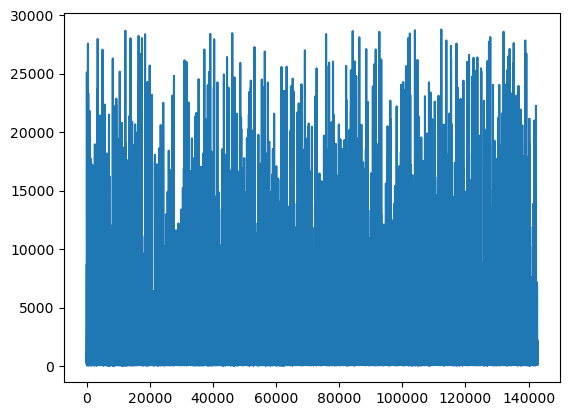

In [72]:
import matplotlib.pyplot as plt
df['tripduration'].plot()

### Adjusting the Plot Style

Matplotlib has a number of plot styles you can use. For example, if you like R you might use the ggplot style:

In [73]:
plt.style.use("ggplot")

### Other plot types

Pandas supports a range of other plotting types; you can find these by using the <TAB> autocomplete on the ``plot`` method:

In [74]:
# plt.

For example, we can create a histogram of trip durations:

<Axes: >

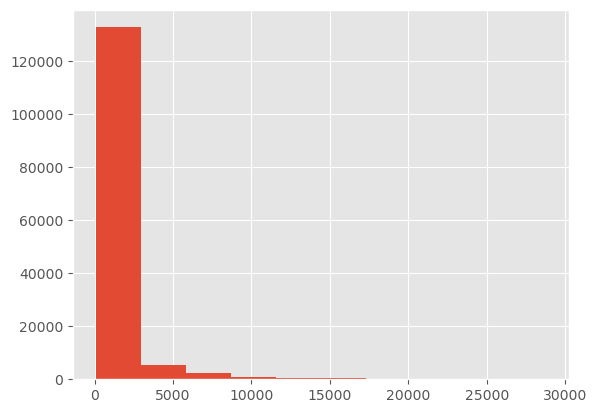

In [75]:
df['tripduration'].hist()

If you'd like to adjust the x and y limits of the plot, you can use the ``set_xlim()`` and ``set_ylim()`` method of the resulting object:

(0.0, 20000.0)

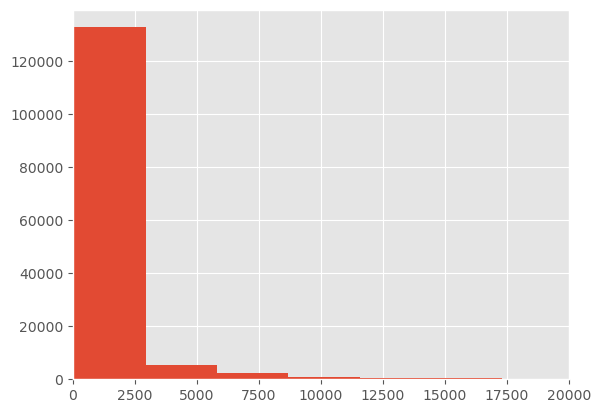

In [76]:
df['tripduration'].hist().set_xlim(0, 20000)

## Breakout: Exploring the Data

Make a plot of the total number of rides as a function of month of the year (You'll need to extract the month, use a ``groupby``, and find the appropriate aggregation to count the number in each group).

<Axes: xlabel='month'>

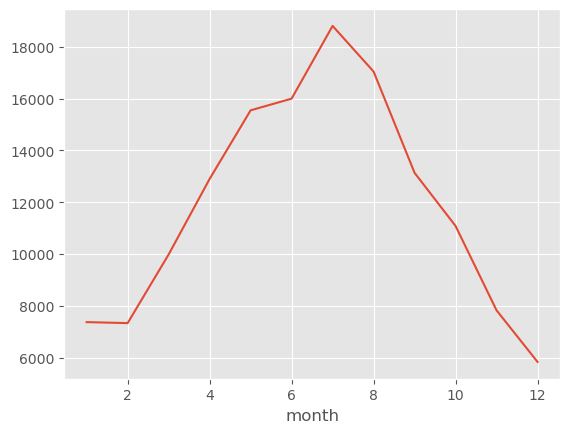

In [77]:
df.groupby('month')['month'].count().plot()

Split this plot by gender. Do you see any seasonal ridership patterns by gender?

<Axes: xlabel='month'>

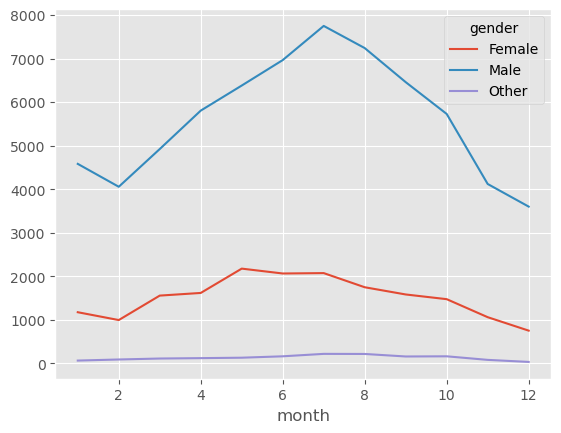

In [78]:
df.groupby(['month', 'gender'])['month'].count().unstack().plot()

Split this plot by user type. Do you see any seasonal ridership patterns by usertype?

<Axes: xlabel='month'>

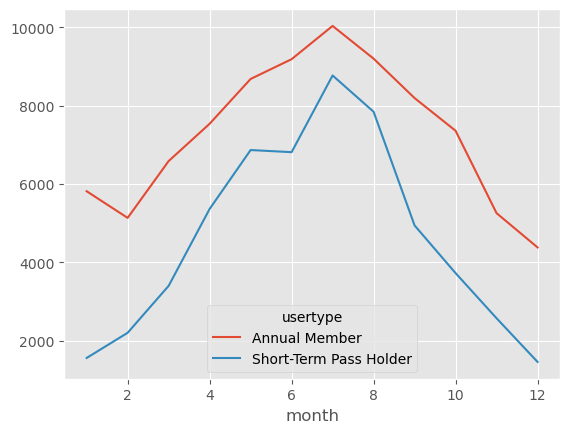

In [79]:
df.groupby(['month', 'usertype'])['month'].count().unstack().plot()

Repeat the above three steps, counting the number of rides by time of day rather that by month.

<Axes: xlabel='hour'>

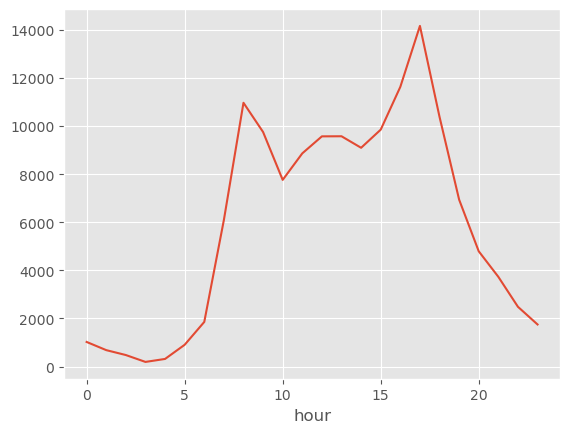

In [80]:
df.groupby('hour')['hour'].count().plot()

<Axes: xlabel='hour'>

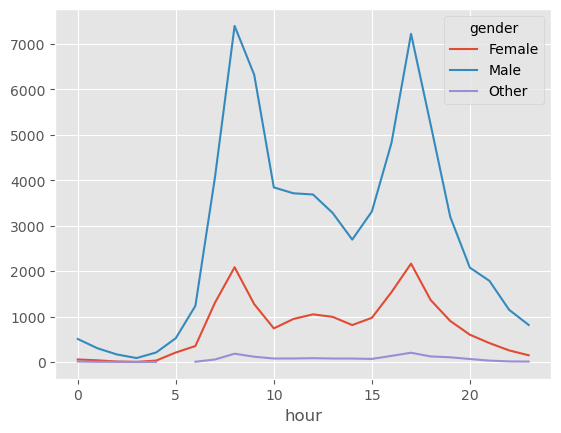

In [81]:
df.groupby(['hour', 'gender'])['month'].count().unstack().plot()

<Axes: xlabel='hour'>

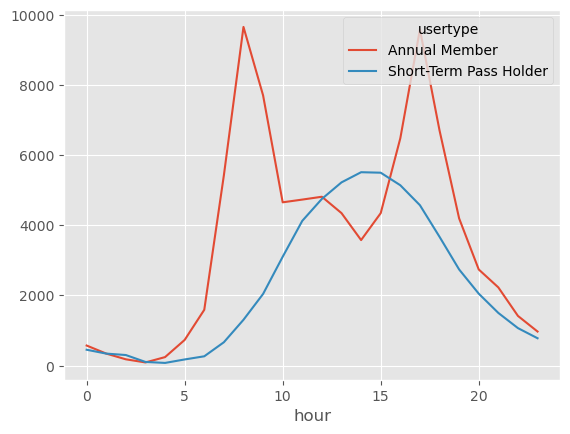

In [82]:
df.groupby(['hour', 'usertype'])['month'].count().unstack().plot()

Are there any other interesting insights you can discover in the data using these tools?